In [7]:
from ast import literal_eval  
import math   
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time

from collections import defaultdict
from matplotlib.colors import to_rgb
from matplotlib.collections import PolyCollection   

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2, context="paper")

# Comparison of feature selected datasets: `clinical`, `clinical+T1`, `T1`

In [8]:
df_scoring = pd.DataFrame()

bestModels = {"T1":"rfc", 
              "clinical":"gnb",
              "clinical_T1":"rfc"}

for dataset, model in bestModels.items():
    print(dataset)
    if dataset == "T1": 
        timepoint = "12_sterol_discoveryValidation_corrected" 
        fs = "iterativeBoruta"
    else: timepoint = "12_uponAdmission"
    if dataset == "clinical_T1":
        fs = "clinical+bestSterols"
    if dataset == "clinical": 
        fs = "boruta"

    df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/prediction_cv_test_{model}.csv") 
    df["varSet"] = dataset
    df_scoring = pd.concat([df_scoring, df], axis=0)

T1
clinical
clinical_T1


In [9]:
df_scoring

,precision,recall,f1,accuracy,model,auc,varSet
0,0.848684,0.962687,0.902098,0.829268,rfc,0.663682,T1
0,0.976000,0.910448,0.942085,0.908537,gnb,0.954726,clinical
0,0.926471,0.940299,0.933333,0.890244,rfc,0.949502,clinical_T1


Text(0.5, 1.0, 'Corrected sterols')

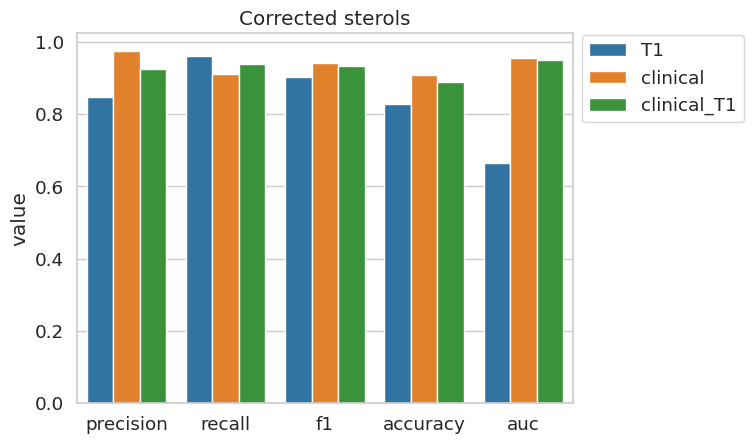

In [11]:
df_scoring_plot = df_scoring.drop("model", axis=1)
df_scoring_plot = df_scoring_plot.melt("varSet")

fig, ax = plt.subplots()
sns.barplot(data=df_scoring_plot, x="variable", y="value", hue="varSet")
ax.legend(bbox_to_anchor=(1.0, 1.02))
ax.set_xlabel("")
ax.set_title("Corrected sterols")

## Difference corrected and uncorrected sterols

Text(0.5, 1.0, 'T1: Un-corrected vs corrected sterols')

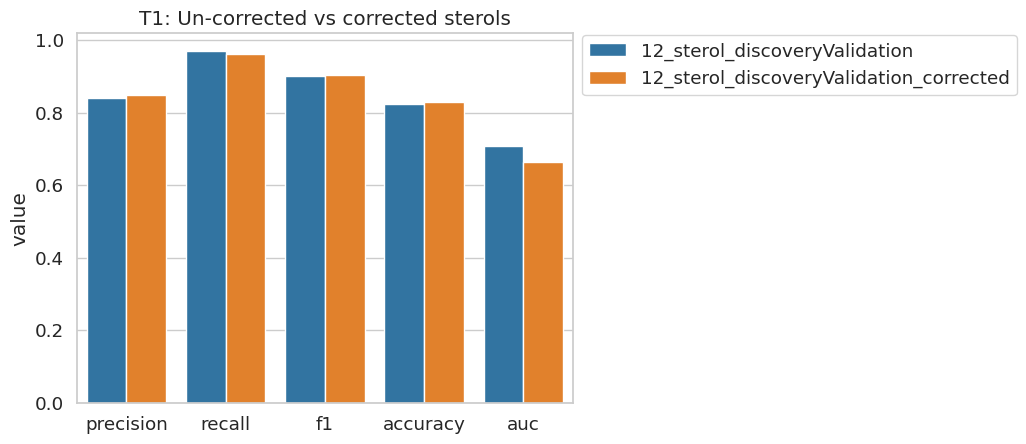

In [20]:
df_scoring = pd.DataFrame()

dataset = "T1"
model = "rfc"
for timepoint, fs in zip(["12_sterol_discoveryValidation", "12_sterol_discoveryValidation_corrected"], ["boruta", "iterativeBoruta"]):
    df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/prediction_cv_test_{model}.csv") 
    df["varSet"] = timepoint
    df_scoring = pd.concat([df_scoring, df], axis=0)

df_scoring_plot = df_scoring.drop("model", axis=1)
df_scoring_plot = df_scoring_plot.melt("varSet")

fig, ax = plt.subplots()
sns.barplot(data=df_scoring_plot, x="variable", y="value", hue="varSet")
ax.legend(bbox_to_anchor=(1.0, 1.02))
ax.set_xlabel("")
ax.set_title(f"{dataset}: Un-corrected vs corrected sterols")

Text(0.5, 1.0, 'clinical_T1: Un-corrected vs corrected sterols')

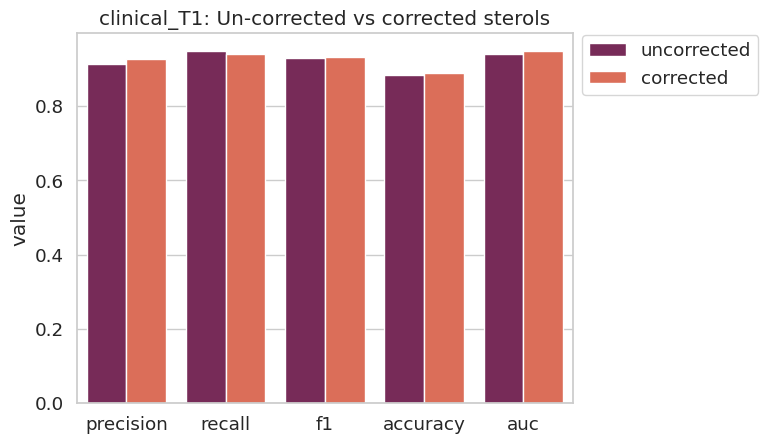

In [32]:
df_scoring = pd.DataFrame()

dataset = "clinical_T1"
timepoint = "12_uponAdmission"
model = "rfc"
for fs, name in zip(["boruta+bestSterols", "clinical+bestSterols"], ["uncorrected", "corrected"]):
    df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/prediction_cv_test_{model}.csv") 
    df["varSet"] = name
    df_scoring = pd.concat([df_scoring, df], axis=0)

df_scoring_plot = df_scoring.drop("model", axis=1)
df_scoring_plot = df_scoring_plot.melt("varSet")

fig, ax = plt.subplots()
sns.barplot(data=df_scoring_plot, x="variable", y="value", hue="varSet", palette="rocket")
ax.legend(bbox_to_anchor=(1.0, 1.02))
ax.set_xlabel("")
ax.set_title(f"{dataset}: Un-corrected vs corrected sterols")

In [30]:
df_scoring_plot

,varSet,variable,value
0,boruta+bestSterols,precision,0.913669
1,clinical+bestSterols,precision,0.926471
2,boruta+bestSterols,recall,0.947761
3,clinical+bestSterols,recall,0.940299
4,boruta+bestSterols,f1,0.930403
5,clinical+bestSterols,f1,0.933333
6,boruta+bestSterols,accuracy,0.884146
7,clinical+bestSterols,accuracy,0.890244
8,boruta+bestSterols,auc,0.941542
9,clinical+bestSterols,auc,0.949502
